## Задание 1

Придумайте структуру данных, которая бы работала бы как стек, при этом позволяла бы находить максмальный элемент на стеке за O(1).

*Подсказка:* структуру deque в Python можно использовать как стек.

In [17]:
from collections import deque

class MaxStack:
    def __init__(self):
        self.values = deque()
        self.size = 0
        pass
        
    def append(self, value):
        if not self.size or value > self.values[self.size - 1][1]:
            self.values.append((value, value))
        else:
            self.values.append((value,self.values[self.size - 1][1]))
        self.size += 1
        pass
    
    def pop(self):
        if self.size:
            self.values.pop()
            self.size -= 1
        else:
            raise "Pop from empty list!"
        pass
    
    def max(self):
        if not self.size:
            return 0
        return self.values[self.size - 1][1]
        pass

Пример **хорошо** реализованного стека:

In [18]:
stack = MaxStack()

for i in range(1_000_000):
    stack.append(i)

In [19]:
%%timeit

stack.max()

165 ns ± 0.732 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
stack.max()

999999

In [21]:
stack.pop()
stack.pop()
stack.max()

999997

In [23]:
r = MaxStack()
r.append(5)
r.append(6)
r.append(2)
r.append(1)
print(r.max())
r.pop()
r.pop()
r.pop()
print(r.max())

6
5


Пример **плохо** реализованного стека:

In [4]:
stack = deque()

for i in range(1_000_000):
    stack.append(i)

In [5]:
%%timeit

max(stack)

18 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Задание 2

Напишите батч-итератор, который бы позволял считывать изображения из заданной директории батчами. Иными словами нужно считывать частями и не хранить их все в памяти. Итератор должен иметь возможность выдавать изображения в перемешанном (случайном) порядке.

*Подсказка:*
Получить все имена файлов в директории можно, например, так:
```python
_, _, filenames = next(os.walk(path))
```
Считать изображение так:
```python
image = Image.open(filename)
```

In [56]:
import math
from math import ceil

In [69]:
import os
import random

from PIL import Image

class BatchIterator:
    def __init__(self, path, size=10, shuffle=True):
        self.path = path
        self.size = size
        _, _, filenames = next(os.walk(path))
        if shuffle:
            random.shuffle(filenames)
        self.filenames = filenames
        self.cur = 0
        self.maxi = ceil(len(self.filenames) / self.size)

    def __iter__(self):
        return self
    
    def __next__(self):
        if self.cur == self.maxi:
            raise StopIteration()
        names = self.filenames[self.size * self.cur : min(self.size *\
        (self.cur + 1), len(self.filenames))]
        batch = [Image.open(self.path + '/' + name) for name in names]
        self.cur += 1
        return batch
    pass

In [74]:
it = BatchIterator('images', size=10)

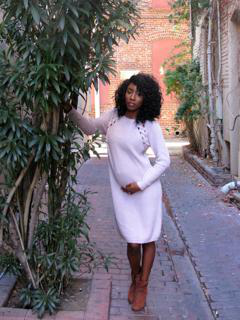

In [75]:
next(it)[0]

In [76]:
next(it)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582ABDD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582ABFD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582B99D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582B9690>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582B9C10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582B9290>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582B9D10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582AA8D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582AA850>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7F01582AA5D0>]

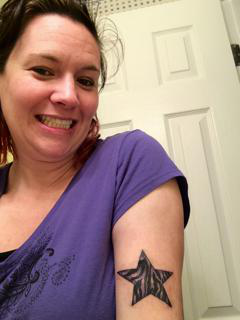

In [77]:
for i, image in enumerate(BatchIterator('images', size=5, shuffle=True)):
    if i == 5:
        break
        
image[0]

----------

На платформе Delivery Club рестораны с быстрой скоростью доставки (готовка блюда + доставка блюда курьером до клиента), как правило - это рестораны, которые пользуются наибольшей популярность среди пользователей и получают наивысшую оценку (5 баллов).

Дан датасет **quality_restaurants.csv**, который преставляет из себя выборку с характеристиками некоторых ресторанов платформы DC. 

*avg_cook_time* - среднее время готовки ресторана, 

*avg_rest_toclient_time* - среднее время доставки блюда курьером ресторана до клиента, 

*rating* - бальная оценка ресторана (средний пользовательский рейтинг).

### Задание 3

Сформировать статистическую гипотезу и проверить, отличается ли средняя скорость готовки ресторанов с рейтингом 1 балл и рейтингом 5 баллов.

*Примечание*: использовать уровень значимости равный 1%.

In [33]:
from scipy.stats import normaltest

In [37]:
import pandas as pd
restr = pd.read_csv('files/quality_restaurants.csv')
rating_1 = restr[restr['rating'] == 1]['avg_cook_time']
rating_5 = restr[restr['rating'] == 5]['avg_cook_time']

In [38]:
normaltest(rating_1)[1]

0.25060292291689035

In [39]:
normaltest(rating_5)[1]

0.036856518926816746

Так как 0.25 > 0.01 и 0.03 > 0.01, можно считать, что данные имеют нормальное распределение, значит, можно применить F-критерий. 
H0 - выборки взяты из одного распределения(среднее время совпадает)
H1 - выборки взяты из разных распределений(среднее время разное)

In [32]:
from scipy import stats
stats.f_oneway(rating_1['avg_cook_time'], rating_5['avg_cook_time'])

F_onewayResult(statistic=9.659296014111893, pvalue=0.002181399688040042)

Так как pvalue < 0.01, то гипотеза отвергается, значит, среднее время разное

### Задание 4

1. Построить линейную модель зависимости рейтинга ресторана от скорости доставки и скорости приготовления блюд с помощью метода наименьших квадратов.
2. Интерпретировать полученное качество модели (проанализировать остатки модели, значимость модели, значимость используемых фичей и т.д.).
3. Улучшить качество модели (метрика - коэффициент детерминации).

In [79]:
from numpy.linalg import inv
import numpy as np

In [80]:
X = restr[['avg_cook_time', 'avg_rest_toclient_time']].values
y = restr['rating'].values


X = np.hstack((X, np.ones((X.shape[0], 1))))

w = inv(X.T.dot(X)).dot(X.T).dot(y)

In [81]:
restr['predicted_analytical_solution'] = w[0] * restr['avg_cook_time'] + w[1] * restr['avg_rest_toclient_time'] + w[2]

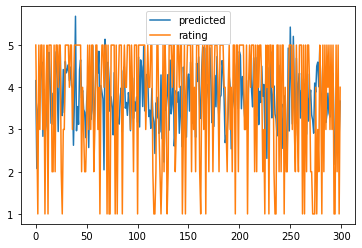

In [84]:
import matplotlib.pyplot as plt
plt.plot(restr['predicted_analytical_solution'], label='predicted')
plt.plot(restr['rating'], label='true')
plt.legend(labels=['predicted', 'rating'])
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(restr['rating'], restr['predicted_analytical_solution'])

1.7511446150561039

Довольно большое отклонение, к сожалению. Данная модель не дает точного отражения действительности

Оценим важность фичей:

In [87]:
X_first = X[:, [0, 2]]
w = inv(X_first.T.dot(X_first)).dot(X_first.T).dot(y)

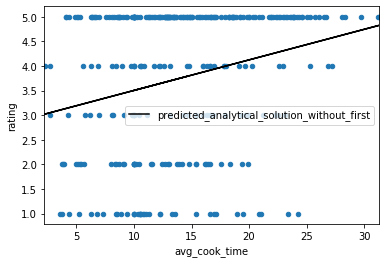

In [98]:
restr['predicted_analytical_solution_without_first'] = w[0] * restr['avg_cook_time'] + w[1]

ax1 = plt.subplot(111)
restr.plot.scatter('avg_cook_time', 'rating', ax = ax1)
restr.plot.line('avg_cook_time', 'predicted_analytical_solution_without_first', ax = ax1, color ='black')
plt.show()

In [100]:
mean_squared_error(restr['predicted_analytical_solution_without_first'], restr['rating'])

2.0554176198157474

MSE не сильно увеличилась

In [102]:
X_second = X[:, [1, 2]]
w = inv(X_first_feature.T.dot(X_second)).dot(X_second.T).dot(y)

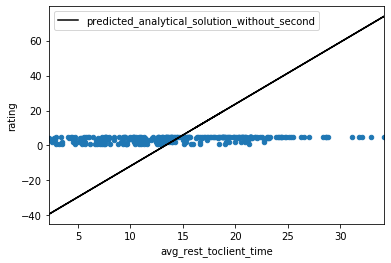

In [105]:
restr['predicted_analytical_solution_without_second'] = w[0] * restr['avg_rest_toclient_time'] + w[1]

ax1 = plt.subplot(111)

restr.plot.scatter('avg_rest_toclient_time', 'rating', ax = ax1)
restr.plot.line('avg_rest_toclient_time', 'predicted_analytical_solution_without_second', ax = ax1,color = 'black')
plt.show()

In [106]:
mean_squared_error(restr['predicted_analytical_solution_without_second'], restr['avg_rest_toclient_time'])

393.0940497622477

MSE возрасла гораздо более существенно, значит, эта фича более важна

Итак, среднее время приготовления заказа гораздо более важно, чем среднее время доставки от ресторана до клиента

Улучшим R-squared

In [117]:
import statsmodels.formula.api as smf
smf.ols(formula='rating ~ avg_cook_time + avg_rest_toclient_time', data=restr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     37.99
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.03e-15
Time:                        21:01:33   Log-Likelihood:                -509.72
No. Observations:                 300   AIC:                             1025.
Df Residuals:                     297   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.7214      0.251      6.850      0.000       1.227       2.216
avg_cook_time              0.0589      0.013      4.677      0.000       0.034       0.084
avg_rest_toclient_time     0.0838      0.012      7.184      0.000       0.061       0.107
==============================================================================
Omnibus:                       24.758   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.315
Skew:                          -0.524   Prob(JB):                     6.39e-05
Kurtosis:                       2.331   Cond. No.                         69.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
smf.ols(formula='rating ~ avg_cook_time - avg_rest_toclient_time', data=restr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     20.84
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           7.31e-06
Time:                        21:01:14   Log-Likelihood:                -533.75
No. Observations:                 300   AIC:                             1072.
Df Residuals:                     298   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8817      0.208     13.840      0.000       2.472       3.291
avg_cook_time     0.0622      0.014      4.565      0.000       0.035       0.089
==============================================================================
Omnibus:                       48.365   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.397
Skew:                          -0.666   Prob(JB):                     1.52e-07
Kurtosis:                       2.142   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно, оптимизируемая метрика уменьшилась примерно в три раза

### Задание 5

Дана таблица **CLIENTS** со следующими столбцами: id (идентификатор клиента), point (местоположение клиента).
Также дана таблица **RESTAURANTS**, поля - id (идентификатор ресторана), point (местоположение ресторана).
Задача - написать SQL-запрос, отвечающий на следующий вопрос: какое среднее расстояние между каждым клиентом и каждым рестораном.

*Примечание*: функция для вычисления расстояни между 2 местоположениями - st_distance(point1,point2).

In [ ]:
SELECT st_distance(CLIENTS.point, RESTAURANTS.point) AS distance FROM CLIENTS, RESTAURANTS